In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

### Data preprocessing

In [41]:
df_classifier_q1 = pd.read_csv('classificacao_Q2.csv')

In [1217]:
df_classifier_q1.shape

(2500, 14)

In [1125]:
df_classifier_q1.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,target
0,-1.39917,0.96108,-0.36145,0.26092,2.78953,-1.55046,-0.79886,0.24304,1.51733,-0.03357,-1.51127,-0.97444,-0.01934,0
1,-2.48564,1.24529,-0.39431,1.06648,1.71957,-0.60296,-2.35698,-2.31878,0.95555,-2.00420,-0.75294,-3.64680,-0.55923,0
2,-0.57025,0.65495,-0.73706,0.22444,-0.44094,-0.42596,0.44267,-1.74196,-0.06599,-0.36783,0.93065,-0.72392,0.37139,0
3,2.10165,1.46236,-0.25678,2.58908,-3.40158,2.43561,0.74701,-0.65229,-0.45497,-1.57951,2.07367,1.86435,-0.37664,1
4,3.01588,-2.50913,-2.01442,2.10296,-3.05465,5.38227,0.46846,1.57586,3.02176,-0.86271,-1.14418,-0.89712,0.61823,1


<AxesSubplot:>

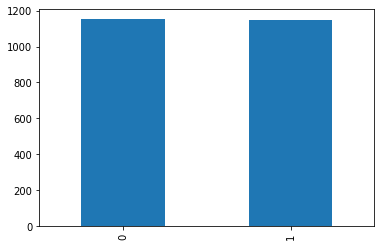

In [1270]:
df_classifier_q1['target'].value_counts().plot.bar()

### PCA

In [1222]:
from sklearn.decomposition import PCA

X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

pca = PCA(n_components=7)
pca_result = pca.fit_transform(X)

In [1223]:
pca.explained_variance_ratio_.sum()

0.9999999999991145

In [1224]:
df_classifier_q1 = pd.concat([pd.DataFrame(pca_result), y], axis=1)

### LDA

In [1252]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [1266]:
for i in df_classifier_q1.columns:
    Q1 = df_classifier_q1[i].quantile(0.25)
    Q3 = df_classifier_q1[i].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df_classifier_q1[i] >= Q1 - 1.5 * IQR) & (df_classifier_q1[i] <= Q3 + 1.5 *IQR)
    df_classifier_q1 = df_classifier_q1.loc[filter]

In [747]:
g = df_classifier_q1.groupby('target')
df_classifier_q1 = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))

<AxesSubplot:>

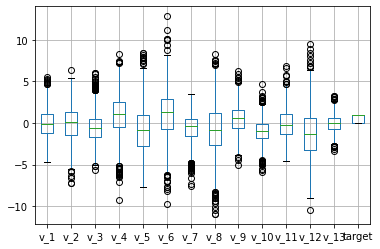

In [42]:
df_classifier_q1.boxplot()

In [487]:
df_classifier_q1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1532 entries, (0, 0) to (1, 765)
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_1     1532 non-null   float64
 1   v_2     1532 non-null   float64
 2   v_3     1532 non-null   float64
 3   v_4     1532 non-null   float64
 4   v_5     1532 non-null   float64
 5   v_6     1532 non-null   float64
 6   v_7     1532 non-null   float64
 7   v_8     1532 non-null   float64
 8   v_9     1532 non-null   float64
 9   v_10    1532 non-null   float64
 10  v_11    1532 non-null   float64
 11  v_12    1532 non-null   float64
 12  target  1532 non-null   int64  
dtypes: float64(12), int64(1)
memory usage: 160.4 KB


In [993]:
df_classifier_q1.isna().sum()

0         0
1         0
2         0
3         0
4         0
5         0
target    0
dtype: int64

In [1299]:
data = df_classifier_q1.iloc[:, :-1]
target = df_classifier_q1['target']

clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(data, target)

importance = clf.feature_importances_
importance

array([0.20797157, 0.03634754, 0.08322476, 0.04119923, 0.09285834,
       0.08440889, 0.0502835 , 0.07236204, 0.13210003, 0.04499116,
       0.04371433, 0.09109882, 0.01943979])

In [1300]:
model = SelectFromModel(clf, prefit=True)
df_new = model.transform(data)

In [1301]:
n_attrs = df_new.shape[1]

idx_most_important = importance.argsort()[-n_attrs:]
print(idx_most_important)

name_important_attrs = np.array(data.columns)[idx_most_important]
print(name_important_attrs)

[ 2  5 11  4  8  0]
['v_3' 'v_6' 'v_12' 'v_5' 'v_9' 'v_1']


In [1302]:
import seaborn as sns
import matplotlib.pyplot as plt

In [1303]:
data = data[name_important_attrs]

[Text(0.5, 0, 'v_3'),
 Text(1.5, 0, 'v_6'),
 Text(2.5, 0, 'v_12'),
 Text(3.5, 0, 'v_5'),
 Text(4.5, 0, 'v_9'),
 Text(5.5, 0, 'v_1')]

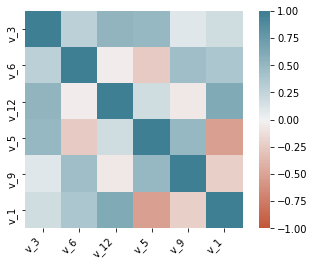

In [1304]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [1337]:
X = df_classifier_q1[['v_1', 'v_3', 'v_5', 'v_6', 'v_9', 'v_12']]
y = df_classifier_q1['target']

In [494]:
X = df_classifier_q1[['v_2', 'v_4', 'v_8']]
y = df_classifier_q1['target']

In [1673]:
X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

In [1674]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)

In [1675]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### KNN

In [1681]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [1682]:
y_pred = knn.predict(X_test)

In [1683]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[228  15]
 [  9 288]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       243
           1       0.95      0.97      0.96       297

    accuracy                           0.96       540
   macro avg       0.96      0.95      0.95       540
weighted avg       0.96      0.96      0.96       540



In [1679]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

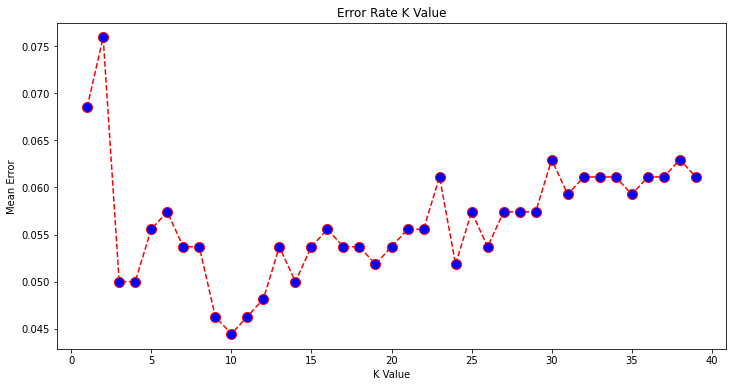

In [1680]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### SVM

In [1684]:
X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

In [1685]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)

In [1686]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1687]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [1688]:
y_pred = svc.predict(X_test)

In [1689]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[212  31]
 [ 17 280]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       243
           1       0.90      0.94      0.92       297

    accuracy                           0.91       540
   macro avg       0.91      0.91      0.91       540
weighted avg       0.91      0.91      0.91       540



In [1690]:
svc = SVC(C=0.5)
svc.fit(X_train, y_train)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [1691]:
y_pred = svc.predict(X_test)

In [1692]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[224  19]
 [  7 290]]
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       243
           1       0.94      0.98      0.96       297

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



### Decision Tree

In [43]:
X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

In [1191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1192]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate

model = DecisionTreeClassifier(criterion='entropy')
scores = cross_validate(model, X, y, scoring='neg_log_loss', cv=10, return_train_score=True, n_jobs=-1)
#classifier.fit(X_train, y_train)

In [45]:
scores

{'fit_time': array([0.05599761, 0.06098247, 0.06299853, 0.06198192, 0.05900097,
        0.05599642, 0.06299329, 0.06399608, 0.04399562, 0.04199505]),
 'score_time': array([0.00200057, 0.00300002, 0.00200152, 0.00200057, 0.00200152,
        0.00300002, 0.00200319, 0.00200152, 0.0010004 , 0.0010004 ]),
 'test_score': array([-5.36665924, -5.50426393, -6.63150584, -5.5262554 , -4.97365097,
        -4.28284985, -6.35520522, -5.11178368, -5.8258723 , -5.96460793]),
 'train_score': array([-9.99200722e-16, -9.99200722e-16, -9.99200722e-16, -9.99200722e-16,
        -9.99200722e-16, -9.99200722e-16, -9.99200722e-16, -9.99200722e-16,
        -9.99200722e-16, -9.99200722e-16])}

In [46]:
scores_train = abs(scores['train_score'])
scores_test = abs(scores['test_score'])
print('train: ', np.mean(scores_train))
print('test: ', np.mean(scores_test))

train:  9.992007221626413e-16
test:  5.554265435723887


In [1450]:
y_pred = classifier.predict(X_test)

In [1451]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[317  48]
 [ 60 325]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       365
           1       0.87      0.84      0.86       385

    accuracy                           0.86       750
   macro avg       0.86      0.86      0.86       750
weighted avg       0.86      0.86      0.86       750



### Random Forest

In [1196]:
X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

In [1197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1198]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [850]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42, n_jobs=-1)
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_classifier = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=10)
CV_classifier.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'c

In [851]:
CV_classifier.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [1452]:
classifier = RandomForestClassifier(
    n_estimators=500, criterion='entropy', max_features='auto', max_depth=8, random_state=42
)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [1453]:
y_pred = classifier.predict(X_test)

In [1454]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[329  36]
 [ 23 362]]
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       365
           1       0.91      0.94      0.92       385

    accuracy                           0.92       750
   macro avg       0.92      0.92      0.92       750
weighted avg       0.92      0.92      0.92       750

0.9213333333333333


### Naive Bayes

In [1202]:
X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

In [1203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1204]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1455]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, y_train)

In [1456]:
predicted_probas = model.predict_proba(X_test)

In [1457]:
y_pred = model.predict(X_test)

In [1458]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[296  69]
 [ 57 328]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       365
           1       0.83      0.85      0.84       385

    accuracy                           0.83       750
   macro avg       0.83      0.83      0.83       750
weighted avg       0.83      0.83      0.83       750



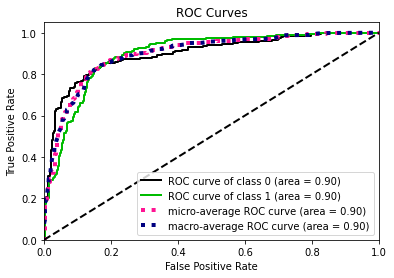

In [1459]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()

### Logistic Regression

In [47]:
X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

In [1470]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1471]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', C=0.1)
scores = cross_validate(model, X, y, scoring='roc_auc', cv=10, return_train_score=True, n_jobs=-1)

In [49]:
scores

{'fit_time': array([0.0210011 , 0.03001142, 0.01800036, 0.01699924, 0.02200103,
        0.01299977, 0.01099825, 0.00799751, 0.00699949, 0.00699925]),
 'score_time': array([0.00500226, 0.00098896, 0.00200152, 0.00200152, 0.0019989 ,
        0.00200152, 0.00300288, 0.00200152, 0.00100279, 0.00103116]),
 'test_score': array([0.86114286, 0.88095238, 0.84888633, 0.89522529, 0.87679211,
        0.91852279, 0.86533538, 0.86949565, 0.88206452, 0.86890323]),
 'train_score': array([0.88093739, 0.87887957, 0.88178347, 0.87704571, 0.87893418,
        0.87450931, 0.88021265, 0.87978833, 0.8786992 , 0.87989601])}

In [50]:
scores_train = abs(scores['train_score'])
scores_test = abs(scores['test_score'])
print('train: ', np.mean(scores_train))
print('test: ', np.mean(scores_test))

train:  0.8790685824761368
test:  0.876732053251408


In [56]:
import sklearn

sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [1473]:
y_pred = clf.predict(X_test)

In [1474]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[299  66]
 [ 63 322]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       365
           1       0.83      0.84      0.83       385

    accuracy                           0.83       750
   macro avg       0.83      0.83      0.83       750
weighted avg       0.83      0.83      0.83       750



### SGD

In [1562]:
X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

In [1563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [1564]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1608]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss="log", penalty="l2", max_iter=500, random_state=42)
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=500,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [1609]:
y_pred = sgd.predict(X_test)

In [1610]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[290  75]
 [ 62 323]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       365
           1       0.81      0.84      0.83       385

    accuracy                           0.82       750
   macro avg       0.82      0.82      0.82       750
weighted avg       0.82      0.82      0.82       750



### MLP

In [1693]:
X = df_classifier_q1.drop('target', axis=1)
y = df_classifier_q1['target']

In [1694]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)

In [1695]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [1696]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42, max_iter=300).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [1697]:
y_pred = mlp.predict(X_test)

In [1698]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[225  18]
 [  6 291]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       243
           1       0.94      0.98      0.96       297

    accuracy                           0.96       540
   macro avg       0.96      0.95      0.95       540
weighted avg       0.96      0.96      0.96       540

